https://medium.com/analytics-vidhya/predicting-stock-prices-using-facebooks-prophet-model-b1716c733ea6#:~:text=Prophet%20is%20a%20procedure%20for,daily%20seasonality%2C%20plus%20holiday%20effects.&text=with%2C%20g(t)%20representing,linear%20model%20for%20trend%20forecasting.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("df4.csv", parse_dates=['Date'])
# df.head()

In [2]:
df = df[["Date","Close"]] 
# Rename the features: These names are required for the model fitting
df = df.rename(columns = {"Date":"ds","Close":"y"}) 
# df.head()

In [3]:
from datetime import datetime
cutoff = datetime(2020,1,1)
df_train = df.loc[df.ds < cutoff,].copy()
df_test = df.drop(df_train.index).copy()
df_test.tail(50)

,ds,y
4470,2020-11-17,3609.53
4471,2020-11-18,3567.79
4472,2020-11-19,3581.87
4473,2020-11-20,3557.54
4474,2020-11-23,3577.59
4475,2020-11-24,3635.41
4476,2020-11-25,3629.65
4477,2020-11-27,3638.35
4478,2020-11-30,3621.63
4479,2020-12-01,3662.45


In [4]:
from fbprophet import Prophet
fbp = Prophet(daily_seasonality = True) 
fbp.fit(df_train)
# We need to specify the number of days in future
# We'll be predicting the full 2021 stock prices
fut = fbp.make_future_dataframe(periods=366) 
forecast = fbp.predict(fut)

In [5]:
fc_train = forecast.loc[forecast.ds < cutoff,].copy()
fc_test = forecast.drop(fc_train.index).copy()

In [27]:
import trading_calendars as tc
import pandas as pd
import pytz

xnys = tc.get_calendar('XNYS')
trading_days = [x for x in fc_test.ds if xnys.is_session(x)]
trading_days

<ipython-input-27-12e69de595dc>:6: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  trading_days = [x for x in fc_test.ds if xnys.is_session(x)]


[Timestamp('2020-01-02 00:00:00'),
 Timestamp('2020-01-03 00:00:00'),
 Timestamp('2020-01-06 00:00:00'),
 Timestamp('2020-01-07 00:00:00'),
 Timestamp('2020-01-08 00:00:00'),
 Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-13 00:00:00'),
 Timestamp('2020-01-14 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-17 00:00:00'),
 Timestamp('2020-01-21 00:00:00'),
 Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-

In [7]:
idx = [i for i in fc_test.index if fc_test.ds[i] in trading_days]
fc_test = fc_test.loc[idx, ]
fc_test

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4251,2020-01-02,3139.687514,3018.655153,3172.594171,3139.687514,3139.687514,-44.000409,-44.000409,-44.000409,-45.901201,...,-2.096069,-2.096069,-2.096069,3.996862,3.996862,3.996862,0.0,0.0,0.0,3095.687105
4252,2020-01-03,3140.417328,3020.170936,3173.880829,3140.417328,3140.417328,-43.764092,-43.764092,-43.764092,-45.901201,...,-2.083126,-2.083126,-2.083126,4.220236,4.220236,4.220236,0.0,0.0,0.0,3096.653236
4255,2020-01-06,3142.606772,3024.174360,3174.719299,3142.606772,3142.606772,-44.443363,-44.443363,-44.443363,-45.901201,...,-3.349597,-3.349597,-3.349597,4.807436,4.807436,4.807436,0.0,0.0,0.0,3098.163409
4256,2020-01-07,3143.336586,3029.370941,3177.828051,3143.336586,3143.336586,-42.334985,-42.334985,-42.334985,-45.901201,...,-1.362075,-1.362075,-1.362075,4.928291,4.928291,4.928291,0.0,0.0,0.0,3101.001601
4257,2020-01-08,3144.066401,3024.278155,3171.719051,3144.066401,3144.066401,-43.496810,-43.496810,-43.496810,-45.901201,...,-2.584432,-2.584432,-2.584432,4.988824,4.988824,4.988824,0.0,0.0,0.0,3100.569591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,2020-12-24,3400.231301,3142.395874,3565.476566,3201.955526,3594.066804,-44.633647,-44.633647,-44.633647,-45.901201,...,-2.096069,-2.096069,-2.096069,3.363624,3.363624,3.363624,0.0,0.0,0.0,3355.597655
4612,2020-12-28,3403.150560,3134.727843,3573.234784,3202.095544,3599.069970,-45.966515,-45.966515,-45.966515,-45.901201,...,-3.349597,-3.349597,-3.349597,3.284284,3.284284,3.284284,0.0,0.0,0.0,3357.184044
4613,2020-12-29,3403.880374,3151.568085,3568.705373,3202.274196,3601.073450,-43.869762,-43.869762,-43.869762,-45.901201,...,-1.362075,-1.362075,-1.362075,3.393515,3.393515,3.393515,0.0,0.0,0.0,3360.010612
4614,2020-12-30,3404.610189,3142.775718,3562.709353,3202.452848,3602.524757,-44.940189,-44.940189,-44.940189,-45.901201,...,-2.584432,-2.584432,-2.584432,3.545445,3.545445,3.545445,0.0,0.0,0.0,3359.670000


In [23]:
from sklearn.metrics import mean_squared_error as MSE
mse_train = MSE(fc_train.yhat,df_train.y)
mse_test = MSE(fc_test.yhat, df_test.y[:len(trading_days)])
print(mse_train, mse_test)

3448.5219799368365 77409.84133925167


In [8]:
fc_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
4251,2020-01-02,3095.687105,3018.655153,3172.594171
4252,2020-01-03,3096.653236,3020.170936,3173.880829
4255,2020-01-06,3098.163409,3024.174360,3174.719299
4256,2020-01-07,3101.001601,3029.370941,3177.828051
4257,2020-01-08,3100.569591,3024.278155,3171.719051
...,...,...,...,...
4608,2020-12-24,3355.597655,3142.395874,3565.476566
4612,2020-12-28,3357.184044,3134.727843,3573.234784
4613,2020-12-29,3360.010612,3151.568085,3568.705373
4614,2020-12-30,3359.670000,3142.775718,3562.709353


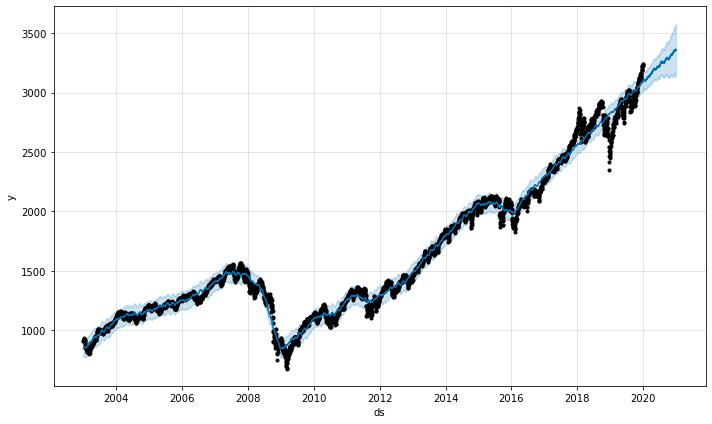

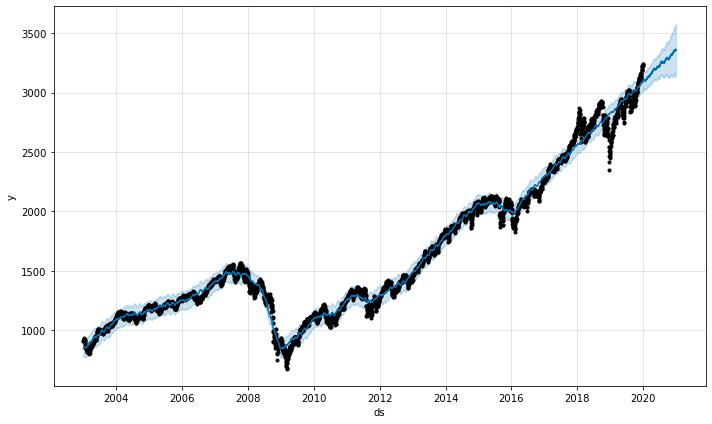

In [9]:
from fbprophet.plot import plot
# A better plot than the simple matplotlib
plot(fbp, forecast)

In [26]:
X = np.array(df_train)
X

array([[Timestamp('2003-01-02 00:00:00'), 909.03],
       [Timestamp('2003-01-03 00:00:00'), 908.59],
       [Timestamp('2003-01-06 00:00:00'), 929.01],
       ...,
       [Timestamp('2019-12-27 00:00:00'), 3240.02],
       [Timestamp('2019-12-30 00:00:00'), 3221.29],
       [Timestamp('2019-12-31 00:00:00'), 3230.78]], dtype=object)

In [ ]:
MSE = []

In [24]:
df_train

,ds,y
0,2003-01-02,909.03
1,2003-01-03,908.59
2,2003-01-06,929.01
3,2003-01-07,922.93
4,2003-01-08,909.93
...,...,...
4245,2019-12-24,3223.38
4246,2019-12-26,3239.91
4247,2019-12-27,3240.02
4248,2019-12-30,3221.29


In [ ]:
from fbprophet import Prophet
fbp = Prophet(daily_seasonality = True) 

In [23]:
from sklearn.model_selection import KFold
from sklearn.base import clone
kfold = KFold(n_splits = 2, shuffle = False, random_state = None)
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    
    
#     fbp.fit(X_)
    
    
#     pred_train = 
    
#     , pred_test = 
    

    print(train_index, test_index)
    print(X[train_index])
    


[2125 2126 2127 ... 4247 4248 4249] [   0    1    2 ... 2122 2123 2124]
[1339.67 1337.88 1339.22 ... 3240.02 3221.29 3230.78]
[   0    1    2 ... 2122 2123 2124] [2125 2126 2127 ... 4247 4248 4249]
[ 909.03  908.59  929.01 ... 1296.67 1307.41 1320.64]


In [14]:
kfold.split(df_train)

<generator object _BaseKFold.split at 0x125d1e660>